Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3311
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -15530.300
Date:                Wed, 16 Apr 2025   AIC                          31072.600
Time:                        14:11:37   BIC                          31109.229
Sample:                             0   HQIC                         31085.710
                               - 3311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.9781      0.006    159.372      0.000       0.966       0.990
ar.L1         -0.8029      0.225     -3.567      0.000      -1.244      -0.362
ar.L2          0.0092      0.018      0.515      0.6

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


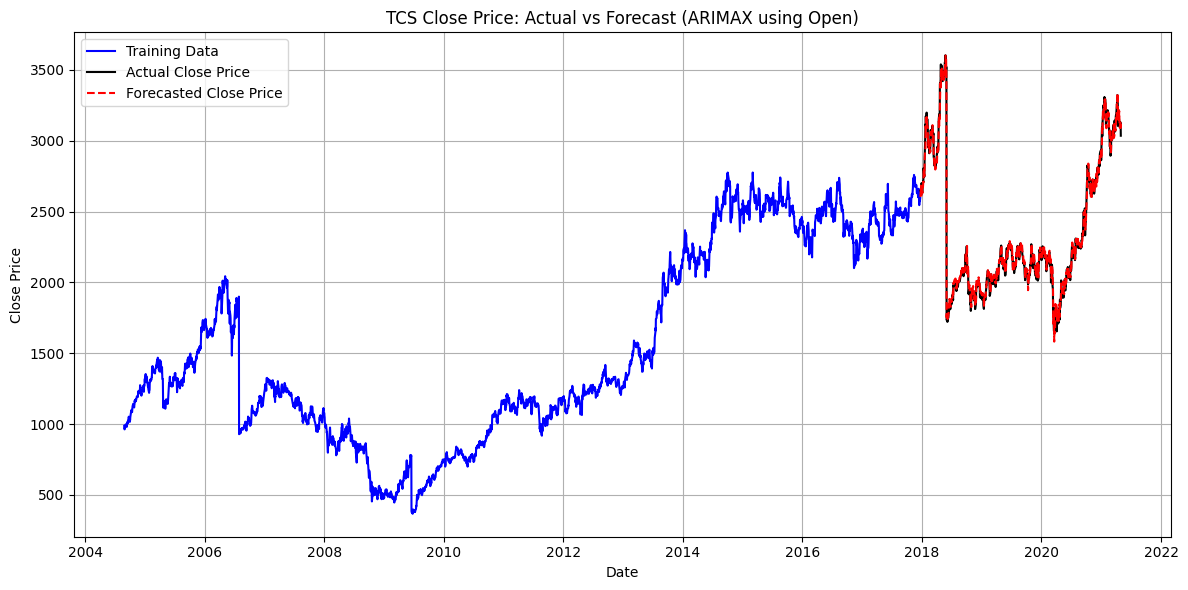

In [15]:
# ARIMAX Model Implementation

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load datasets
df_infosys = pd.read_csv('/content/drive/MyDrive/INFY.csv', parse_dates=['Date'], index_col='Date')
df_tcs = pd.read_csv('/content/drive/MyDrive/TCS.csv', parse_dates=['Date'], index_col='Date')

# Select only 'Close' and 'Open'
df_tcs = df_tcs[['Close', 'Open']]

# Drop rows where either is NaN or inf
df_tcs = df_tcs.replace([np.inf, -np.inf], np.nan).dropna()

# Train-test split
train_size = int(len(df_tcs) * 0.8)
train_tcs = df_tcs.iloc[:train_size]
test_tcs = df_tcs.iloc[train_size:]

# Clean training data
train_tcs = train_tcs.copy()
train_tcs = train_tcs[['Close', 'Open']].dropna()

# Fit ARIMAX model
model_tcs = SARIMAX(
    train_tcs['Close'],
    exog=train_tcs[['Open']],
    order=(2, 1, 2)
)
arimax_fit_tcs = model_tcs.fit()
print(arimax_fit_tcs.summary())

# Clean test set
y_test_tcs = test_tcs['Close']
X_test_tcs = test_tcs[['Open']]

# Align and drop NaNs
y_test_tcs_clean = y_test_tcs.dropna()
X_test_tcs_clean = X_test_tcs.loc[y_test_tcs_clean.index]

# Forecast
forecast_obj_tcs = arimax_fit_tcs.get_forecast(steps=len(X_test_tcs_clean), exog=X_test_tcs_clean)
forecast_series_tcs = forecast_obj_tcs.predicted_mean
forecast_series_tcs.index = X_test_tcs_clean.index
print("NaNs in forecast:", forecast_series_tcs.isna().sum())

# Evaluate the model
valid_idx = ~y_test_tcs.isna() & ~forecast_series_tcs.isna()
y_true_tcs = y_test_tcs[valid_idx]
y_pred_tcs = forecast_series_tcs[valid_idx]

mae = mean_absolute_error(y_true_tcs, y_pred_tcs)
mse = mean_squared_error(y_true_tcs, y_pred_tcs)
rmse = np.sqrt(mse)

print("\nARIMAX Model Performance for TCS")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train_tcs.index, train_tcs['Close'], label="Training Data", color='blue')
plt.plot(y_test_tcs.index, y_test_tcs, label="Actual Close Price", color='black')
plt.plot(forecast_series_tcs.index, forecast_series_tcs,
         label="Forecasted Close Price", color='red', linestyle='dashed')

plt.title("TCS Close Price: Actual vs Forecast (ARIMAX using Open)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Close    0
Open     0
dtype: int64
Close    0
Open     0
dtype: int64
               Close      Open
Date                          
2000-01-03  15625.20  15625.00
2000-01-04  16855.90  16800.00
2000-01-05  15507.45  15701.00
2000-01-06  14266.85  15256.65
2000-01-07  13125.50  13125.50


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4244
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -26067.938
Date:                Wed, 16 Apr 2025   AIC                          52147.876
Time:                        14:11:54   BIC                          52185.995
Sample:                             0   HQIC                         52161.348
                               - 4244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.9974      0.000   4716.503      0.000       0.997       0.998
ar.L1         -0.2840      0.011    -25.777      0.000      -0.306      -0.262
ar.L2         -0.9333      0.012    -79.173      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


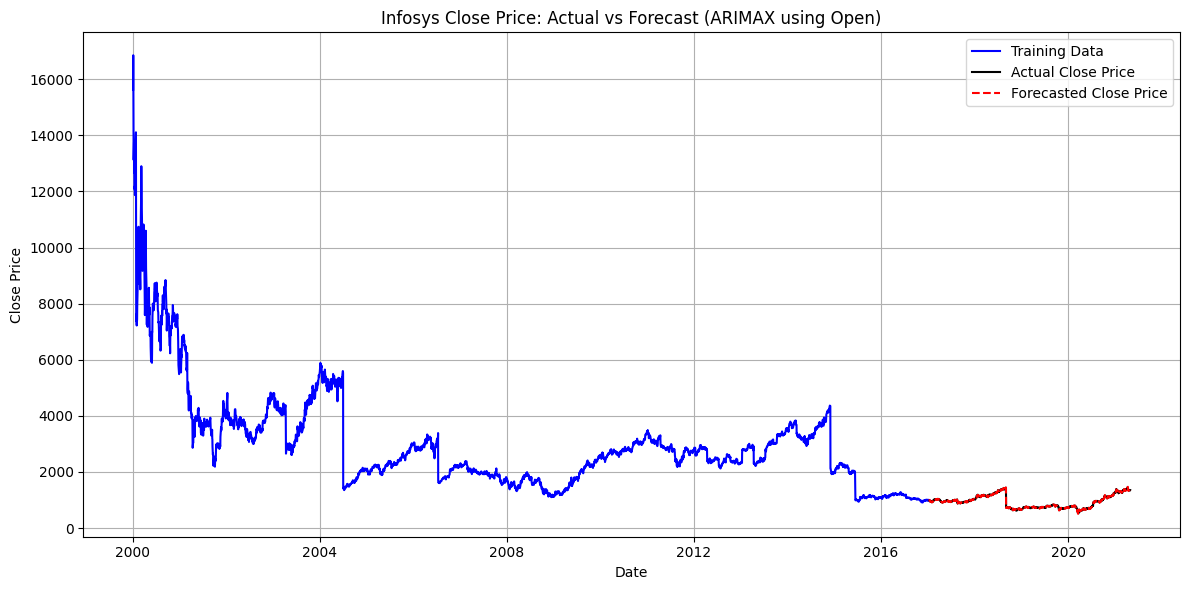

In [16]:

# Select only 'Close' and 'Open'
df_infosys = df_infosys[['Close', 'Open']]

# Drop rows where either is NaN or inf
df_infosys = df_infosys.replace([np.inf, -np.inf], np.nan).dropna()

# Confirm clean data
print(df_infosys.isna().sum())
print(np.isinf(df_infosys).sum())

# Train-test split
train_size = int(len(df_infosys) * 0.8)
train_infy = df_infosys.iloc[:train_size]
test_infy = df_infosys.iloc[train_size:]

# Clean training data
train_infy = train_infy.copy()
train_infy = train_infy[['Close', 'Open']].dropna()
print(train_infy.head())

# Step 3: Fit ARIMAX model
model_infy = SARIMAX(
    train_infy['Close'],
    exog=train_infy[['Open']],
    order=(2, 0, 2)
)
arimax_fit_infy = model_infy.fit()
print(arimax_fit_infy.summary())

# Clean test set
y_test_infy = test_infy['Close']
X_test_infy = test_infy[['Open']]

# Align and drop NaNs
y_test_infy_clean = y_test_infy.dropna()
X_test_infy_clean = X_test_infy.loc[y_test_infy_clean.index]

# Forecast
forecast_obj_infy = arimax_fit_infy.get_forecast(steps=len(X_test_infy_clean), exog=X_test_infy_clean)
forecast_series_infy = forecast_obj_infy.predicted_mean
forecast_series_infy.index = X_test_infy_clean.index
print("NaNs in forecast:", forecast_series_infy.isna().sum())

# Evaluate the model
valid_idx = ~y_test_infy.isna() & ~forecast_series_infy.isna()
y_true_infy = y_test_infy[valid_idx]
y_pred_infy = forecast_series_infy[valid_idx]

mae = mean_absolute_error(y_true_infy, y_pred_infy)
mse = mean_squared_error(y_true_infy, y_pred_infy)
rmse = np.sqrt(mse)

print("\nARIMAX Model Performance for Infosys")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train_infy.index, train_infy['Close'], label="Training Data", color='blue')
plt.plot(y_test_infy.index, y_test_infy, label="Actual Close Price", color='black')
plt.plot(forecast_series_infy.index, forecast_series_infy,
         label="Forecasted Close Price", color='red', linestyle='dashed')

plt.title("Infosys Close Price: Actual vs Forecast (ARIMAX using Open)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
